In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("/content/steam.csv")

In [ ]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [ ]:
df['english'].unique()

array([1, 0])

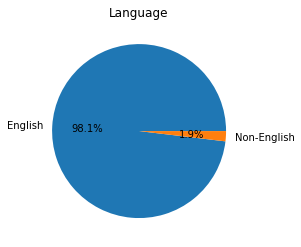

In [ ]:

labels = ['English','Non-English']
plt.title('Language')
plt.pie(df['english'].value_counts().values,labels=labels,autopct="%1.1f%%") #percentage of games that are     
plt.show()

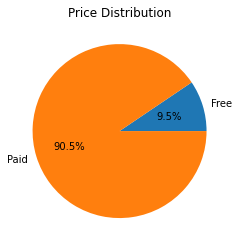

In [ ]:
free = df[df['price']==0].shape[0]
notfree = df[df['price']!=0].shape[0]
plt.title('Price Distribution')
plt.pie([free,notfree],labels=['Free','Paid'],autopct="%1.1f%%")
plt.show()

In [ ]:
free

2560

[]

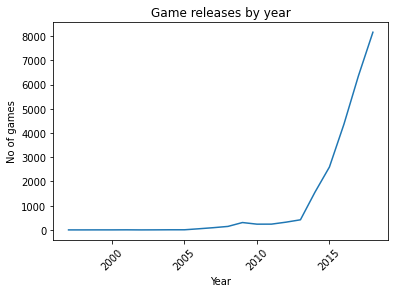

In [ ]:
df['release_date'].dt.year.value_counts().sort_index()[:-1].plot(kind='line')
#sns.barplot(x=df['release_date'].dt.year.value_counts().index[:12],y=df['release_date'].dt.year.value_counts().values[:12])
plt.title("Game releases by year")
plt.ylabel('No of games')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.plot()

In [ ]:
tmp = pd.DataFrame()#calculate median value of owners
tmp[['lower', 'upper']] = df['owners'].str.split('-', expand = True)
tmp['lower'] = tmp['lower'].astype('int')
tmp['upper'] = tmp['upper'].astype('int')
tmp['owner_median'] = (tmp['lower'] + tmp['upper']) / 2
tmp

,lower,upper,owner_median
0,10000000,20000000,15000000.0
1,5000000,10000000,7500000.0
2,5000000,10000000,7500000.0
3,5000000,10000000,7500000.0
4,5000000,10000000,7500000.0
...,...,...,...
27070,0,20000,10000.0
27071,0,20000,10000.0
27072,0,20000,10000.0
27073,0,20000,10000.0


In [ ]:
df['owner_median'] = tmp['owner_median']
df.head(2)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,owner_median
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,15000000.0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,7500000.0


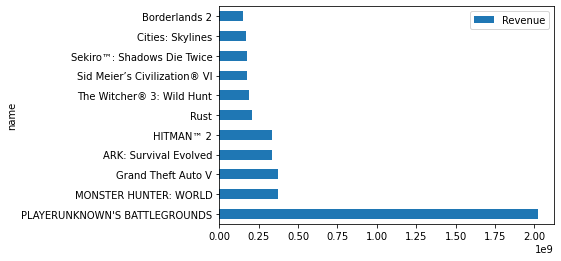

In [ ]:
sales = pd.DataFrame()#This is to calculate revenue earned of each game
sales['Revenue'] = df['owner_median'] * df['price'] #find revenue of each game
sales.index = df['name']
sales.sort_values(['Revenue'], ascending=False).head(11).plot(kind='barh')
plt.show()

In [ ]:
#split platforms into seperate columns with boolean values
os=['windows','mac','linux']
df['windows'], df['mac'], df['linux'] = df['platforms'].apply(lambda x: 'windows' in x),df['platforms'].apply(lambda x: 'mac' in x),df['platforms'].apply(lambda x: 'linux' in x)
df.drop(columns='platforms', inplace=True)
df

,appid,name,release_date,english,developer,publisher,required_age,categories,genres,steamspy_tags,...,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,owner_median,windows,mac,linux
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,124534,3339,17612,317,10000000-20000000,7.19,15000000.0,True,True,True
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,3318,633,277,62,5000000-10000000,3.99,7500000.0,True,True,True
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,...,3416,398,187,34,5000000-10000000,3.99,7500000.0,True,True,True
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,1273,267,258,184,5000000-10000000,3.99,7500000.0,True,True,True
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,...,5250,288,624,415,5000000-10000000,3.99,7500000.0,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,...,3,0,0,0,0-20000,2.09,10000.0,True,False,False
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,...,8,1,0,0,0-20000,1.69,10000.0,True,False,False
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,...,0,1,0,0,0-20000,3.99,10000.0,True,False,False
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,...,2,0,0,0,0-20000,5.19,10000.0,True,True,False


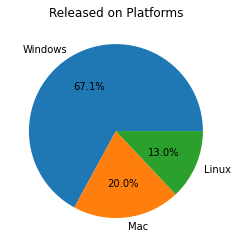

In [ ]:
windows=df[df['windows']].shape[0]
mac=df[df['mac']].shape[0]
linux=df[df['linux']].shape[0]
plt.title('Released on Platforms')
plt.pie([windows,mac,linux],labels=['Windows','Mac','Linux'],autopct='%1.1f%%')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df

,appid,name,release_date,english,developer,publisher,required_age,categories,genres,steamspy_tags,...,negative_ratings,average_playtime,median_playtime,owners,price,owner_median,windows,mac,linux,multiplayer
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,3339,17612,317,10000000-20000000,7.19,15000000.0,True,True,True,True
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,633,277,62,5000000-10000000,3.99,7500000.0,True,True,True,True
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,...,398,187,34,5000000-10000000,3.99,7500000.0,True,True,True,True
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,267,258,184,5000000-10000000,3.99,7500000.0,True,True,True,True
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,...,288,624,415,5000000-10000000,3.99,7500000.0,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,...,0,0,0,0-20000,2.09,10000.0,True,False,False,False
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,...,1,0,0,0-20000,1.69,10000.0,True,False,False,False
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,...,1,0,0,0-20000,3.99,10000.0,True,False,False,True
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,...,0,0,0,0-20000,5.19,10000.0,True,True,False,False


In [ ]:
df.to_csv('steam1.csv')